In [1]:
import pandas as pd
import numpy as np
import folium
from sklearn import preprocessing
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colors as colors

We start with the analysis of the first DataSet which is about the crops. We are taking into account only the years after 2000, for the moment. 

In [2]:
#loading the DataSet
path = 'data/Production_Crops_E_All_Data_NOFLAG.csv'
crops = pd.read_csv(path, encoding = "ISO-8859-1")

In [3]:
crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,12000.0,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,35000.0,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,42000.0,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,NaN,NaN,...,15000.0,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,26019.0,28873.0
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,6000.0,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,6923.0,6830.0


As we can see for the DS for each item, for each country there are three options fro the unit parameter. 
<br>
Production Quantity and Seed: tonnes
<br>
Area harvested: hectares
<br>
Yield: tonnes per hectare.

We decided to keep only Production, this beacuse this feature is the more significant for the purpose of the project in general. **we are probably going to consider the *Area harvest* when we will talk about the energy source consuption**

In [4]:
crops_production = crops[crops['Element']=='Production']
crops_yield = crops[crops['Element']=='Yield']

In [5]:
#years we need to drop
years = ['Y'+str(1900+x) for x in range(61,100)]
crops_production = crops_production.drop(years, axis=1)

In [6]:
crops_production.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2000,Y2001,Y2002,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,12000.0,15000.0,11774.0,...,42000.0,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0
5,2,Afghanistan,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,2500.0,1000.0,2000.0,...,9000.0,11008.0,10200.0,12508.0,12500.0,12500.0,21500.0,18000.0,18012.0,19719.0
8,2,Afghanistan,515,Apples,5510,Production,tonnes,40540.0,39542.0,35630.0,...,56061.0,72765.0,59850.0,62041.0,70000.0,78597.0,89403.0,89733.0,140903.0,175000.0
11,2,Afghanistan,526,Apricots,5510,Production,tonnes,42840.0,38000.0,45758.0,...,59559.0,60000.0,66560.0,67995.0,83500.0,90000.0,90000.0,87686.0,17894.0,131816.0
14,2,Afghanistan,44,Barley,5510,Production,tonnes,74000.0,87000.0,345000.0,...,333000.0,486000.0,437000.0,305900.0,504000.0,514000.0,521000.0,403000.0,301856.0,94995.0


In [7]:
#crops_production['Area'] = crops_production['Area'].replace('United States of America', 'United States')
changes = {'Area' : { 'Bosnia and Herzegovina' : 'Bosnia and Herz.' ,
                    'Brunei Darussalam' : 'Brunei',
                    "Czechoslovakia" : "Czechia",
                    "Republic of Korea" : 'South Korea',
                    "Democratic People's Republic of Korea" : 'North Korea',
                    "Democratic Republic of the Congo" : 'Dem. Rep. Congo',
                    "Bolivia (Plurinational State of)" : 'Bolivia',
                    "Venezuela (Bolivarian Republic of)" : 'Venezuela',
                    "Republic of Moldova" : 'Moldova',
                     "Dominican Republic" : 'Dominican Rep.',
                     "Equatorial Guinea" : "Eq. Guinea",
                     "Eswatini" : "eSwatini",
                     "Ethiopia PDR" : "Ethiopia",
                     "Iran (Islamic Republic of)":"Iran",
                     "Serbia and Montenegro" : "Serbia",
                     "Sudan (former)" : "Sudan",
                     "South Sudan" : "S. Sudan",
                     "Syrian Arab Republic":"Syria",
                     "The former Yugoslav Republic of Macedonia":"Macedonia",
                     "United Republic of Tanzania":"Tanzania",
                     "Viet Nam": "Vietnam",
                     'Russian Federation':"Russia"
                    }}
crops_production= crops_production.replace(changes)

We are now intereste in what are the possible **Item** producted.

In [8]:
#crops_production['Item'].unique()[:10]

For the moment we decided not to clean the Item column. Indeed we are considering the element producted in term of tonnes.

Now we need to classify the country in terms of production, wed like to remember we are taking into account only the last years.

In [9]:
crops_production = crops_production.groupby('Area').sum()
to_drop = ['Area Code','Item Code','Element Code']
crops_production = crops_production.drop(to_drop, axis=1)

We have to drop the index which are not rapresenting a country, but a region

In [10]:
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries = set(world_df['name'])
to_delete = set(crops_production.index).difference(countries)
crops_production = crops_production.drop(to_delete, axis=0)

In [11]:
def norm(col):
    return col/sum(col)

In [12]:
crops_production['tot'] = crops_production.apply(norm).mean(axis=1)

In [13]:
result = crops_production.sort_values(by=['tot'], ascending=0)
result = result[['tot']]

In [14]:
result['tot'] = result['tot']*100
result.head(10)

,tot
Area,
China,21.094703
United States of America,11.771287
India,9.977253
Brazil,7.096564
Indonesia,3.102458
Russia,2.664134
Nigeria,2.094680
France,1.948839
Argentina,1.805971


In [15]:
def mapp(result,result_name,world_df=world_df):
    merged = world_df.set_index('name').join(result)
    merged = merged.dropna(subset=['tot'])
    vmin, vmax, vcenter = merged.tot.min(), merged.tot.max(), 0.1
    divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    ax = merged.plot(column='tot', figsize=(15,10),  k=9,norm=divnorm,cmap='OrRd', linewidth=1,edgecolor = "black",
                     legend=True,
                      legend_kwds={'orientation': "horizontal"})
    ax.set_title(result_name)
    ax.figure.savefig(result_name+'.png')
    return

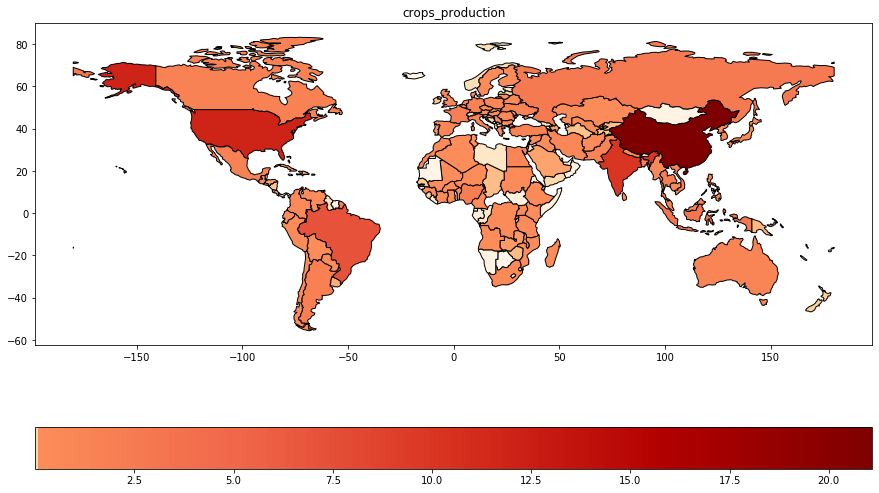

In [16]:
mapp(result,'crops_production')

In [17]:
def clean_df(df,years,to_drop,changes):
    df= df.replace(changes)
    df = df.drop(years, axis=1)
    df = df.groupby('Area').sum()
    df = df.drop(to_drop, axis=1)
    to_delete = set(df.index).difference(countries)
    df = df.drop(to_delete, axis=0)
    df['tot'] = 0
    df['tot'] = df.apply(norm).mean(axis=1)
    df = df.sort_values(by=['tot'], ascending=0)
    df = df[['tot']]
    df['tot'] = df['tot']*100
    return df

We reapeat the some for the DS Yield

In [18]:
to_drop = ['Area Code','Item Code','Element Code']
result = clean_df(crops_yield,years,to_drop,changes)

In [19]:
result.head(10)

,tot
Area,
Netherlands,5.996938
Belgium,2.172529
Spain,1.768431
United Kingdom,1.656336
United States of America,1.582834
China,1.551331
Greece,1.420066
Israel,1.360792
France,1.310022


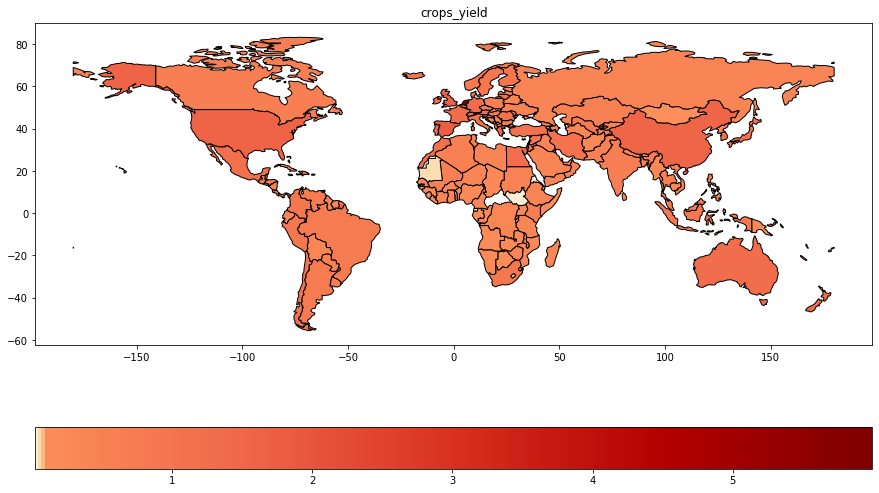

In [20]:
m = mapp(result,'crops_yield')

In [21]:
path = 'data/Production_CropsProcessed_E_All_Data.csv'
crops_processed = pd.read_csv(path, encoding = "ISO-8859-1")

In [22]:
crops_processed.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2010,Y2010F,Y2011,Y2011F,Y2012,Y2012F,Y2013,Y2013F,Y2014,Y2014F
0,2,Afghanistan,767,Cotton lint,5510,Production,tonnes,17000.0,*,26000.0,...,10890.0,Im,10890.0,Im,11979.0,Im,13917.0,Im,14000.0,F
1,2,Afghanistan,329,Cottonseed,5510,Production,tonnes,34000.0,*,52000.0,...,21450.0,Im,21450.0,Im,23595.0,Im,42173.0,NaN,42829.0,NaN
2,2,Afghanistan,165,Molasses,5510,Production,tonnes,2120.0,Fc,3023.0,...,1210.0,Im,1212.0,Im,1153.0,Im,1188.0,Im,1017.0,Im
3,2,Afghanistan,331,"Oil, cottonseed",5510,Production,tonnes,4997.0,Fc,7716.0,...,3653.0,Im,3653.0,Im,4018.0,Im,4714.0,Im,7489.0,Im
4,2,Afghanistan,334,"Oil, linseed",5510,Production,tonnes,3531.0,Fc,3701.0,...,356.0,Im,784.0,Im,784.0,Im,784.0,Im,790.0,F


In [23]:
years = ['Y'+str(1900+x) for x in range(61,100)] + ['Y'+str(1900+x)+'F' for x in range(61,100)] +['Y'+str(2000+x)+'F' for x in range(0,15)]
to_drop = ['Area Code','Item Code','Element Code']

In [24]:
result = clean_df(crops_processed,years,to_drop,changes)

In [25]:
result.head(10)

,tot
Area,
China,14.245341
Brazil,10.526859
United States of America,9.879390
India,8.331336
Indonesia,4.477078
Malaysia,3.605248
Germany,3.134286
Mexico,2.666634
Russia,2.609068


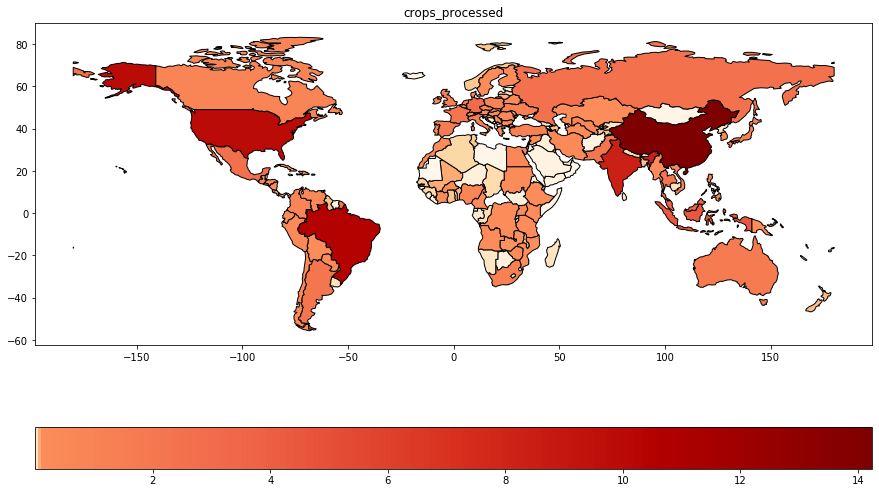

In [26]:
m = mapp(result,'crops_processed')

In [27]:
path = 'data/Production_LivestockPrimary_E_All_Data_NOFLAG.csv'
live_stock = pd.read_csv(path, encoding = "ISO-8859-1")

In [28]:
live_stock.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1000 Head,4000.0,4400.0,4600.0,...,9100.0,8700.0,8200.0,9600.0,9500.0,9500.0,9500.0,9337.0,9369.0,10688.0
1,2,Afghanistan,1062,"Eggs, hen, in shell",5410,Yield,100mg/An,25000.0,25000.0,25000.0,...,18349.0,19285.0,19932.0,17927.0,18947.0,18947.0,19474.0,21253.0,21263.0,18713.0
2,2,Afghanistan,1062,"Eggs, hen, in shell",5510,Production,tonnes,10000.0,11000.0,11500.0,...,16698.0,16778.0,16344.0,17210.0,18000.0,18000.0,18500.0,19844.0,19921.0,20000.0
3,2,Afghanistan,1067,"Eggs, hen, in shell (number)",5513,Production,1000 No,200000.0,220000.0,230000.0,...,333960.0,335560.0,326880.0,344200.0,360000.0,360000.0,370000.0,396880.0,398420.0,400000.0
4,2,Afghanistan,919,"Hides, cattle, fresh",5320,Producing Animals/Slaughtered,Head,360000.0,384000.0,396000.0,...,739000.0,750000.0,727800.0,766700.0,772000.0,744500.0,NaN,NaN,NaN,NaN


In [29]:
live_stock_production = live_stock[live_stock['Element']=='Production']
live_stock_yield = live_stock[live_stock['Element']=='Yield']

In [30]:
years = ['Y'+str(1900+x) for x in range(61,100)] #+ ['Y'+str(1900+x)+'F' for x in range(61,100)] +['Y'+str(2000+x)+'F' for x in range(0,15)]
to_drop = ['Area Code','Item Code','Element Code']

In [31]:
result = clean_df(live_stock_production,years,to_drop,changes)
result.head(10)

,tot
Area,
China,26.831183
United States of America,9.811041
India,7.100201
Brazil,4.612094
Russia,2.878415
Germany,2.403003
France,2.084316
Pakistan,2.076309
Mexico,2.074285


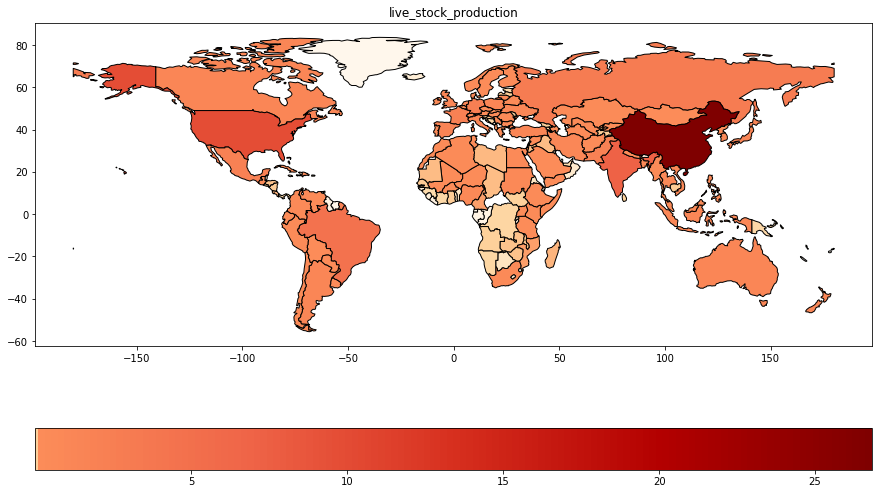

In [32]:
mapp(result,'live_stock_production')

In [33]:
result = clean_df(live_stock_yield,years,to_drop,changes)
result.head(10)

,tot
Area,
Spain,2.203696
Denmark,1.493994
Portugal,1.383084
Sweden,1.377540
Finland,1.331340
Germany,1.324137
Luxembourg,1.307739
Switzerland,1.307457
Japan,1.298045


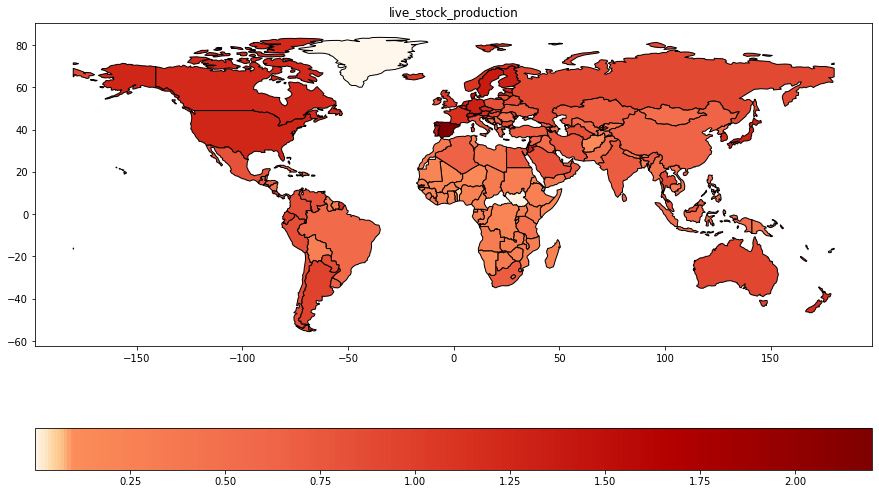

In [34]:
mapp(result,'live_stock_production')

In [35]:
path = 'data/Value_of_Production_E_All_Data_NOFLAG.csv'
Value_of_production = pd.read_csv(path, encoding = "ISO-8859-1")

In [36]:
Value_of_production.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,2,Afghanistan,221,"Almonds, with shell",152,Gross Production Value (constant 2004-2006 100...,1000 Int. $,NaN,NaN,NaN,...,92899.455089,123940.698000,127431.694327,165254.264000,178861.182059,182960.078000,124575.156335,80856.550600,71549.194374,96918.674867
1,2,Afghanistan,221,"Almonds, with shell",154,Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,NaN,NaN,NaN,...,92899.455089,123940.698000,127431.694327,165254.264000,178861.182059,182960.078000,124575.156335,80856.550600,71549.194374,96918.674867
2,2,Afghanistan,221,"Almonds, with shell",56,Gross Production Value (current million SLC),SLC,NaN,NaN,NaN,...,5433.830473,8980.020000,8032.038000,12079.200000,13995.079900,14911.000000,9230.459191,5563.109132,4824.773367,6050.024466
3,2,Afghanistan,221,"Almonds, with shell",55,Gross Production Value (constant 2004-2006 mil...,SLC,NaN,NaN,NaN,...,3280.355179,4376.446667,4499.716581,5835.262222,6315.733546,6460.468889,4398.849906,2855.110444,2526.460140,3422.277092
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",152,Gross Production Value (constant 2004-2006 100...,1000 Int. $,NaN,NaN,NaN,...,93962.672000,49744.944000,57275.009778,56377.603200,64207.463034,69090.200000,69090.200000,73114.852434,79457.968291,77478.699955


In [37]:
Value_of_production_NET = Value_of_production[Value_of_production['Element']==
                                              'Net Production Value (constant 2004-2006 1000 I$)']

In [38]:
years = ['Y'+str(1900+x) for x in range(61,100)] #+ ['Y'+str(1900+x)+'F' for x in range(61,100)] +['Y'+str(2000+x)+'F' for x in range(0,15)]
to_drop = ['Area Code','Item Code','Element Code']

In [39]:
result = clean_df(Value_of_production_NET,years,to_drop,changes)
result.head(10)

,tot
Area,
China,22.685839
United States of America,10.278637
India,9.900632
Brazil,5.780277
Indonesia,2.542750
Russia,1.999157
France,1.947265
Argentina,1.786272
Pakistan,1.647310


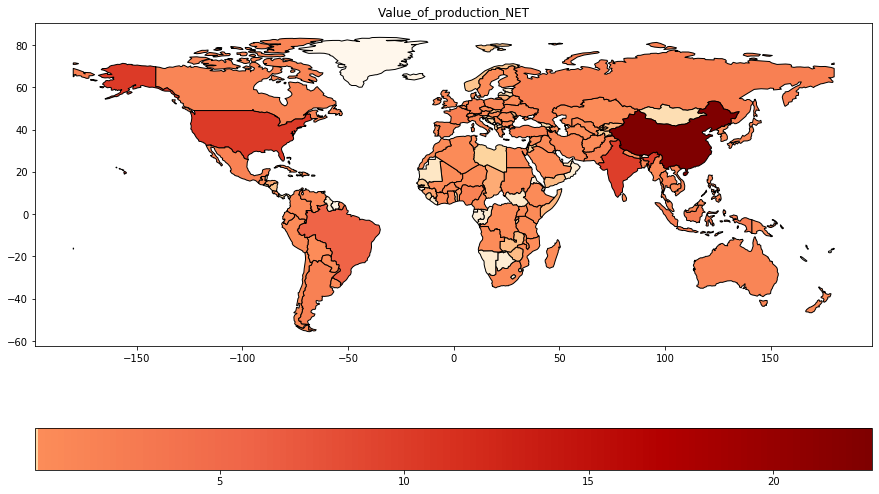

In [40]:
mapp(result,'Value_of_production_NET')